## Analysis of Covid-Tracking Data by US States

Utilizing tracked data recorded from the Covid Tracking Project and estimates of 2020 populations by State from World Population Review.

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
import scipy.stats
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.cm import get_cmap, register_cmap

In [3]:
from IPython import display
import ipywidgets
from ipywidgets.embed import embed_minimal_html

In [4]:
from ipywidgets import interact, widgets

In [5]:
import stat_functions as st

In [6]:
%matplotlib inline

In [7]:
tracking = pd.read_csv('tracking_clean.csv')

In [8]:
tracking.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
tracking.columns

Index(['Data_Completeness_Score_Name', 'People_Positive_New_Cases_Count',
       'People_Positive_Cases_Count', 'People_Negative_New_Count',
       'People_Negative_Cases_Count', 'People_Test_Results_New_Count',
       'People_Pending_Cases_Count', 'Total_Tested_Positive_per_100k',
       'People_Positive_Negative_Test_Results_Count',
       'People_Hospitalized_New_Count', 'People_Hospitalized_Currently_Count',
       'People_Hospitalized_Cumulative_Count',
       'Hospitalizations_per_100k_Incidence',
       'People_In_Intensive_Care_Currently_Count',
       'People_In_Intensive_Care_Cumulative_Count',
       'People_Intubated_Currently_Count', 'People_Intubated_Cumulative_Count',
       'People_Death_New_Count', 'People_Death_Count', 'Deaths_per_100k',
       'Death_Rate', 'People_Recovered_Count', 'Report_Date',
       'Reported_Date_Time', 'Day', 'Month', 'Province_State_Code', 'Pop'],
      dtype='object')

In [10]:
tracking.Reported_Date_Time = tracking.Reported_Date_Time.apply(lambda x: pd.to_datetime(x))

In [11]:
tracking.Data_Completeness_Score_Name.unique()

array(['A', 'B', 'C', 'A+', 'D', 'F', nan], dtype=object)

In [12]:
complete_tracking = tracking[(tracking.Data_Completeness_Score_Name != 'D') &\
                             (tracking.Data_Completeness_Score_Name != 'F')]

In [13]:
complete_tracking.head(10)

Data_Completeness_Score_Name  People_Positive_New_Cases_Count  \
0                            A                               52   
1                            B                             1812   
2                            A                              564   
3                            C                                0   
4                           A+                             3257   
5                            B                            11126   
6                            A                              444   
7                            B                              106   
8                           A+                               80   
9                           A+                               81   

   People_Positive_Cases_Count  People_Negative_New_Count  \
0                       1631.0                       6568   
1                      59067.0                      10148   
2                      30297.0                       4913   
3                          0.0                          0   
4                     131354.0                      10762   
5                     347634.0                     107195   
6                      37686.0                       4591   
7                      47636.0                      12232   
8                      11026.0                       3948   
9                      13050.0                       1707   

   People_Negative_Cases_Count  People_Test_Results_New_Count  \
0                     154462.0                           6620   
1                     481982.0                          11960   
2                     365479.0                           5477   
3                        816.0                              0   
4                     604608.0                          14019   
5                    5445642.0                         118321   
6                     372304.0                           5035   
7                     556463.0                          12338   
8                     126918.0                           4028   
9                     130338.0                           1788   

   People_Pending_Cases_Count  Total_Tested_Positive_per_100k  \
0                         NaN                      222.206479   
1                         NaN                     1203.332097   
2                         NaN                      996.939783   
3                         NaN                             NaN   
4                         NaN                     1780.228746   
5                         NaN                      870.445070   
6                         NaN                      644.697743   
7                         NaN                     1336.933215   
8                         NaN                     1529.929082   
9                         NaN                     1327.710488   

   People_Positive_Negative_Test_Results_Count  People_Hospitalized_New_Count  \
0                                       156093                              0   
1                                       541049                            168   
2                                       395776                             76   
3                                          816                              0   
4                                       735962                            161   
5                                      5793276                              0   
6                                       409990                             22   
7                                       604099                              0   
8                                       137944                              0   
9                                       143388                              0   

   ...  People_Death_Count  Deaths_per_100k  Death_Rate  \
0  ...                17.0         2.316070    0.002316   
1  ...              1211.0        24.670885    0.024671   
2  ...               335.0        11.023363    0.011023   
3  ...                 0.0      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


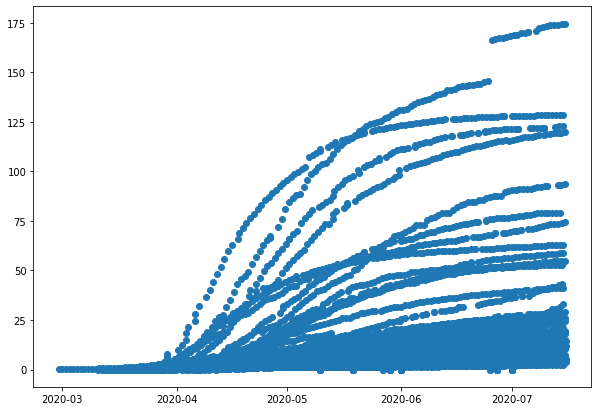

In [14]:
plt.figure(figsize = (10,7))
dates = matplotlib.dates.date2num(complete_tracking.Reported_Date_Time.values)

matplotlib.pyplot.plot_date(dates, complete_tracking.Deaths_per_100k.values)

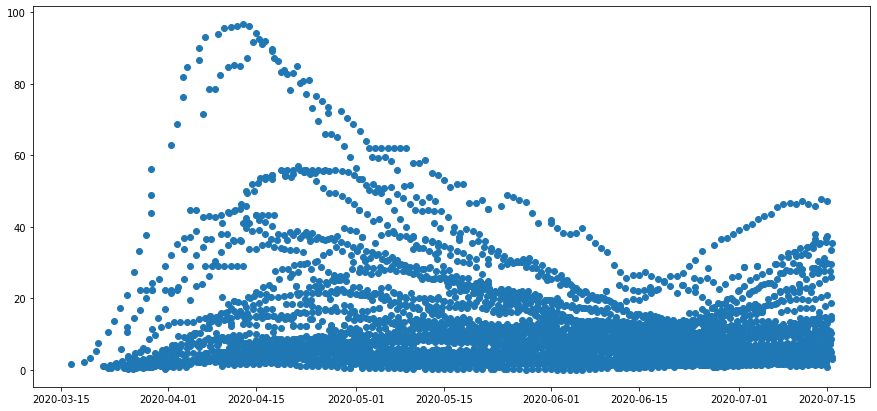

In [15]:
plt.figure(figsize = (15,7))
dates = matplotlib.dates.date2num(complete_tracking.Reported_Date_Time.values)
color = complete_tracking.Death_Rate

matplotlib.pyplot.plot_date(dates, complete_tracking.Hospitalizations_per_100k_Incidence.values)

In [16]:
complete_tracking.Death_Rate.describe()

count    6406.000000
mean        0.017604
std         0.028132
min         0.000000
25%         0.001764
50%         0.006363
75%         0.018266
max         0.174642
Name: Death_Rate, dtype: float64

Note: A potential issue with the date below is that there is a massive outlier of the death data. The death rate is given as percentages, NOT decimals. That is to say, the mean is 0.018%, not 1.8%. The 75% mark shows 0.0183%, yet the maximum is 0.175%, which is an order of magnitutde more intense.

Text(0.5, 1.0, 'Incidence of Hospitalizations in 2020 \n(Red density indicates State Death Rate)')

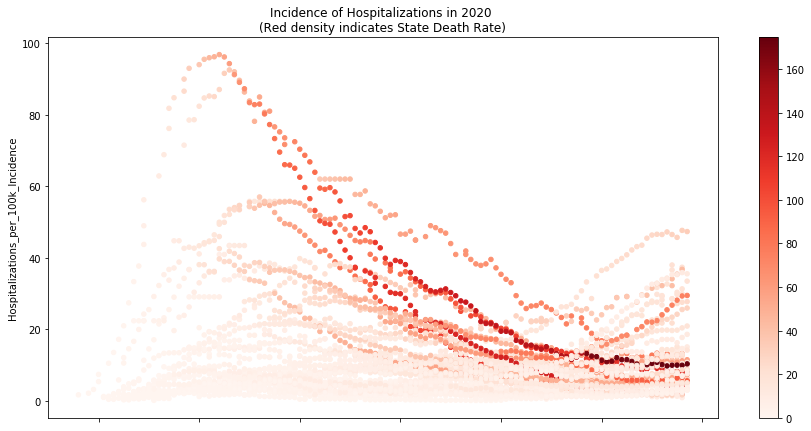

In [17]:
color = complete_tracking.Deaths_per_100k
complete_tracking.plot.scatter('Day','Hospitalizations_per_100k_Incidence', c = color,
                              colormap=matplotlib.cm.get_cmap('Reds'), figsize = (15,7))
plt.title('Incidence of Hospitalizations in 2020 \n(Red density indicates State Death Rate)')

In [18]:
def plot_hosp(state):
    data = tracking[tracking.Province_State_Code == state]
    color = data.Death_Rate
    data.plot.scatter('Day','Hospitalizations_per_100k_Incidence', c = color,
                              colormap=matplotlib.cm.get_cmap('Reds'),vmin = -.01, vmax = 0.04, figsize = (15,7),
                     sharex = False)
    plt.title('Incidence of Hospitalizations in 2020 \n(Red density indicates State Death Rate)')

Make the y widget a pull down option of other info to plot against the day of the year, like intubations, postive cases, etc.

In [19]:
states = tracking.Province_State_Code.unique()
states.sort()
y_vals = ['People_Positive_New_Cases_Count','Total_Tested_Positive_per_100k','Hospitalizations_per_100k_Incidence',
         'People_Recovered_Count']
x_widget = widgets.Dropdown(options = states)
y_widget = widgets.Dropdown(options = y_vals)

In [20]:
interact(plot_hosp, state = x_widget)

interactive(children=(Dropdown(description='state', options=('AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', '…

<function __main__.plot_hosp(state)>

In [21]:
def plot_hosp(state, response):
    data = tracking[tracking.Province_State_Code == state]
    color = data.Death_Rate
    data.plot.scatter('Day',response, c = color,
                              colormap=matplotlib.cm.get_cmap('Reds'),figsize = (12,7),
                     sharex = False)
    plt.title('Red density indicates State Death Rate')

In [22]:
interact(plot_hosp, state = x_widget, response = y_widget)

interactive(children=(Dropdown(description='state', options=('AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', '…

<function __main__.plot_hosp(state, response)>

In [23]:
deaths_range = complete_tracking.People_Death_Count.values.tolist()

In [24]:
deaths_range = [deaths for deaths in deaths_range if str(deaths) != 'nan']
deaths_range.sort()
deaths_range[:-1:400]

[0.0,
 2.0,
 6.0,
 14.0,
 27.0,
 56.0,
 95.0,
 153.0,
 251.0,
 376.0,
 515.0,
 735.0,
 1073.0,
 1643.0,
 2811.0,
 5612.0,
 24968.0]

In [25]:
tracking.People_Death_New_Count.describe()

count    7409.000000
mean       17.491564
std        55.361857
min      -213.000000
25%         0.000000
50%         3.000000
75%        14.000000
max      1877.000000
Name: People_Death_New_Count, dtype: float64